Matplotlib is building the font cache; this may take a moment.


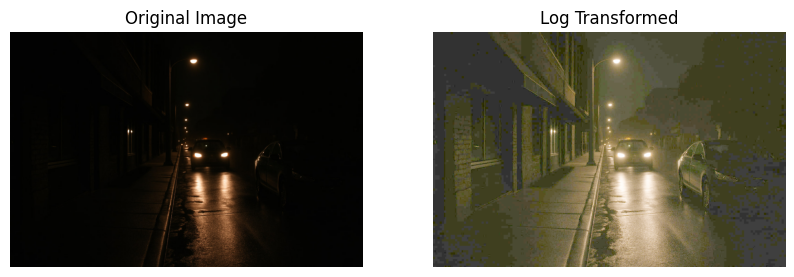

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('c.png')
img = img.astype(np.float32)
c = 255 / (np.log(1 + np.max(img)))
log_transformed = c * np.log(1 + img)
log_transformed = np.array(log_transformed, dtype=np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(log_transformed, cv2.COLOR_BGR2RGB))
plt.title('Log Transformed')
plt.axis('off')

plt.show()


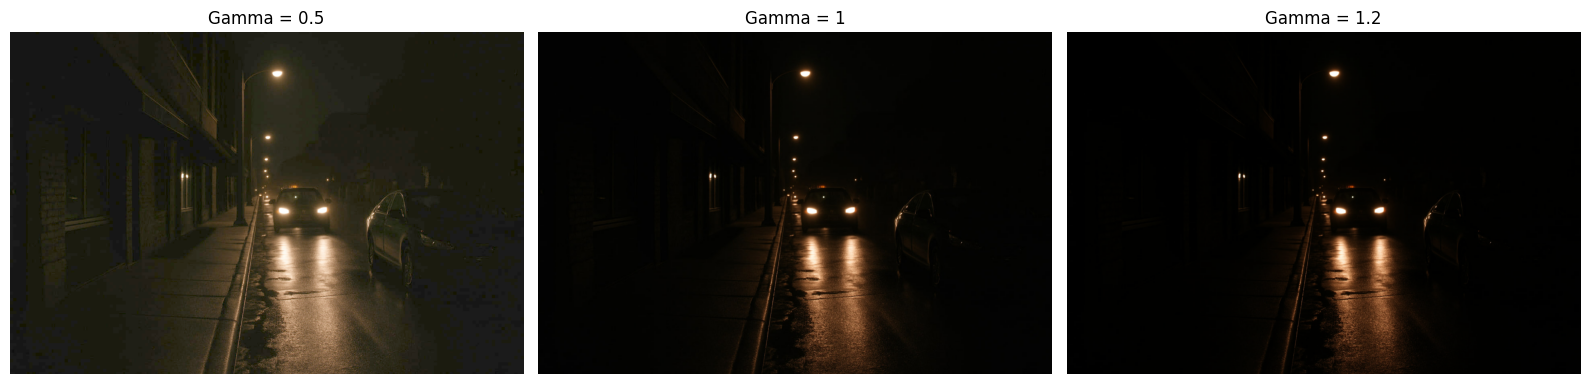

In [2]:
#gamma
import cv2
import numpy as np
from matplotlib import pyplot as plt

gammas = [0.5,1,1.2]

img = cv2.imread('c.png')
img_f = img.astype(np.float32) / 255.0

outputs = []
titles = []

for g in gammas:
    corrected = np.power(img_f, g)
    out = (corrected * 255.0).clip(0, 255).astype(np.uint8)
    outputs.append(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    titles.append(f'Gamma = {g}')

plt.figure(figsize=(16, 5))
for i, (out, title) in enumerate(zip(outputs, titles)):
    plt.subplot(1, 3, i+1)
    plt.imshow(out)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()


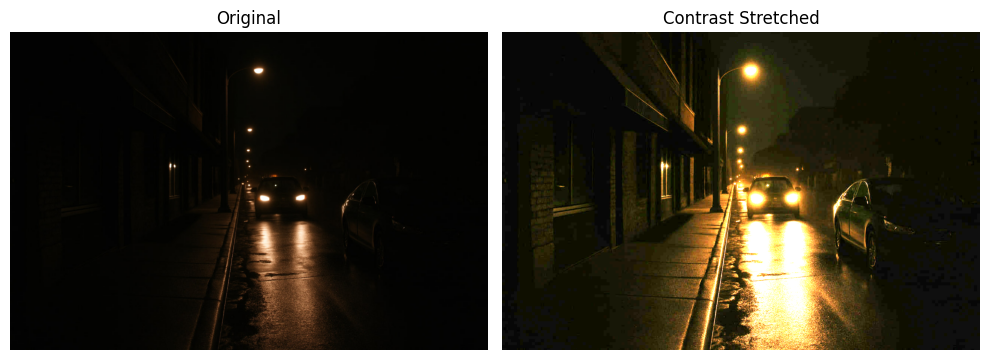

In [11]:
#Piecewise-Linear
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c.png')
img_f = img.astype(np.float32) / 255.0
r1 = np.percentile(img_f, 5)
r2 = np.percentile(img_f, 95)
stretched = (img_f - r1) / (r2 - r1)
stretched = np.clip(stretched, 0, 1)
out = (stretched * 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Original'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)); plt.title('Contrast Stretched'); plt.axis('off')
plt.tight_layout(); plt.show()


In [12]:
import cv2
import numpy as np

# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

# Open the image.
img = cv2.imread('c.png')

# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)

# Save edited image.
cv2.imwrite('contrast_stretch.jpg', contrast_stretched)

True